# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [1]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


### EDA

In [2]:
print(df.info())
print('-'*25)
print(df.describe())
print('-'*25)
print(df.describe(include='category'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None
-------------------------
                age        

In [3]:
print(f"duplicates:{df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"after_removing_duplicates:{df.duplicated().sum()}")

duplicates:52
after_removing_duplicates:0


In [4]:
print(df.isna().sum())
print("-"*25)
print(f"Total Null:{df.isna().sum().sum()}")

age                  0
workclass         2795
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
class                0
dtype: int64
-------------------------
Total Null:6456


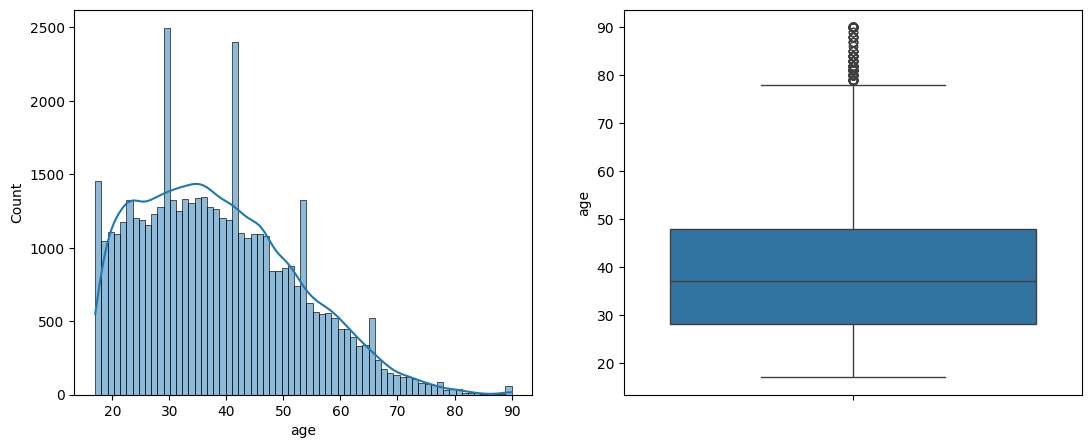

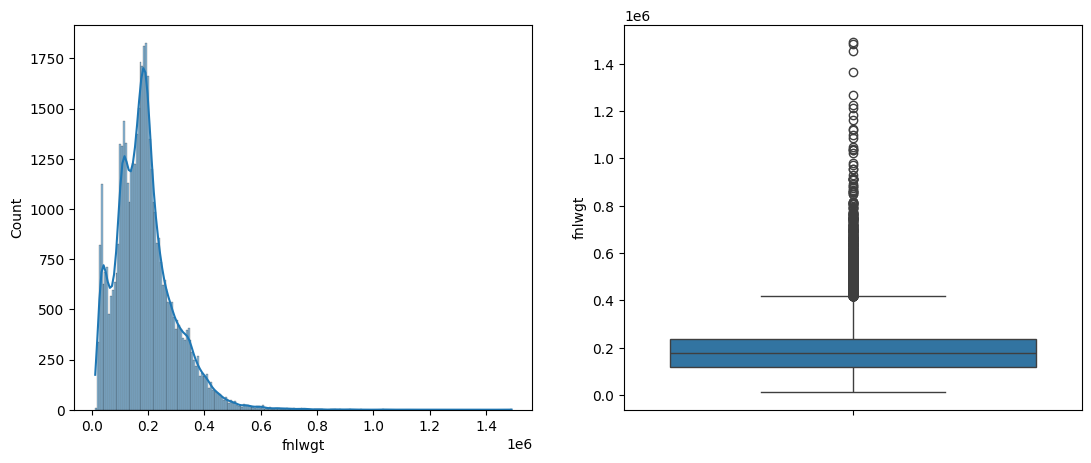

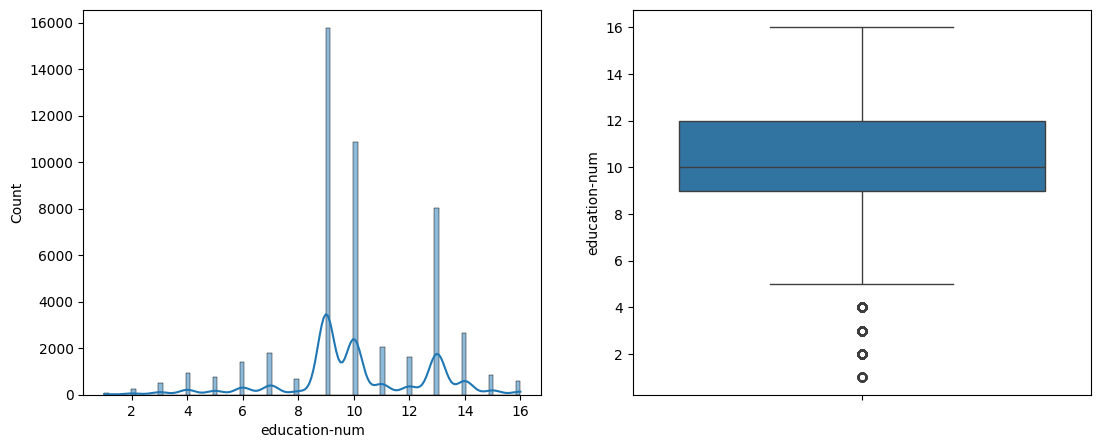

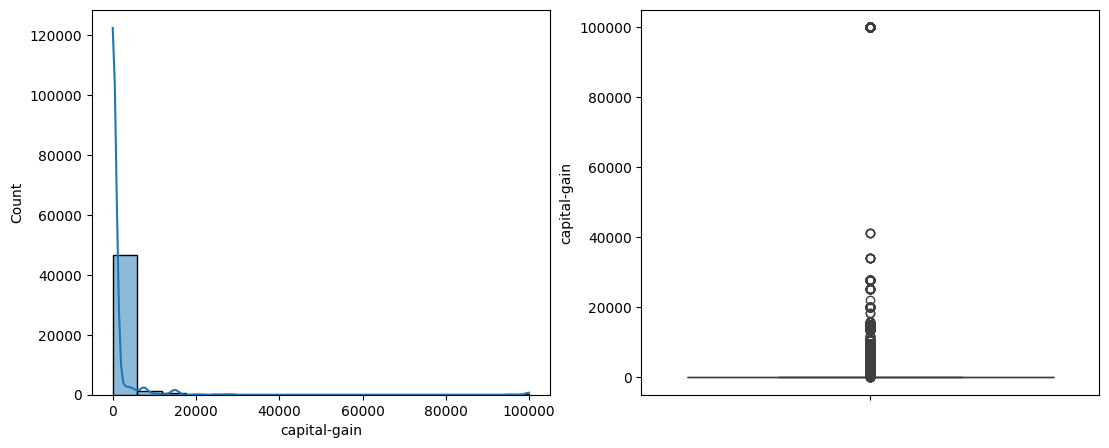

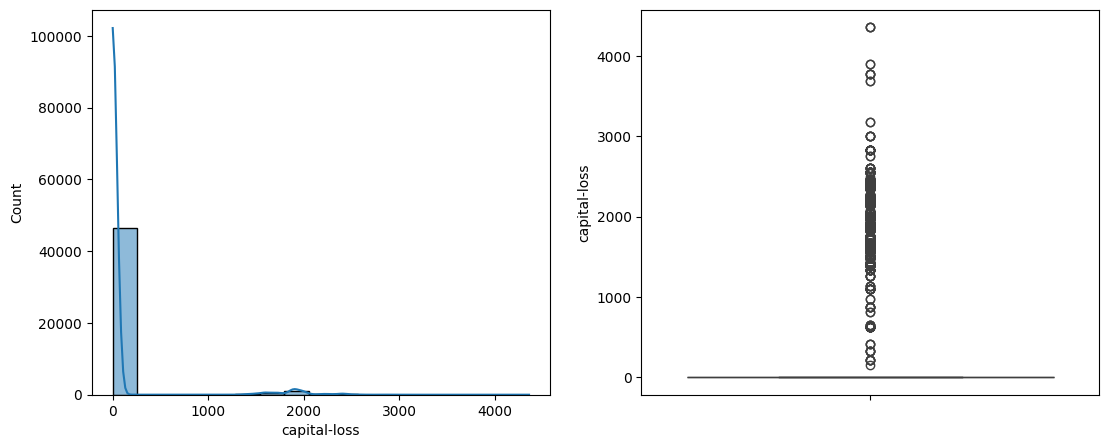

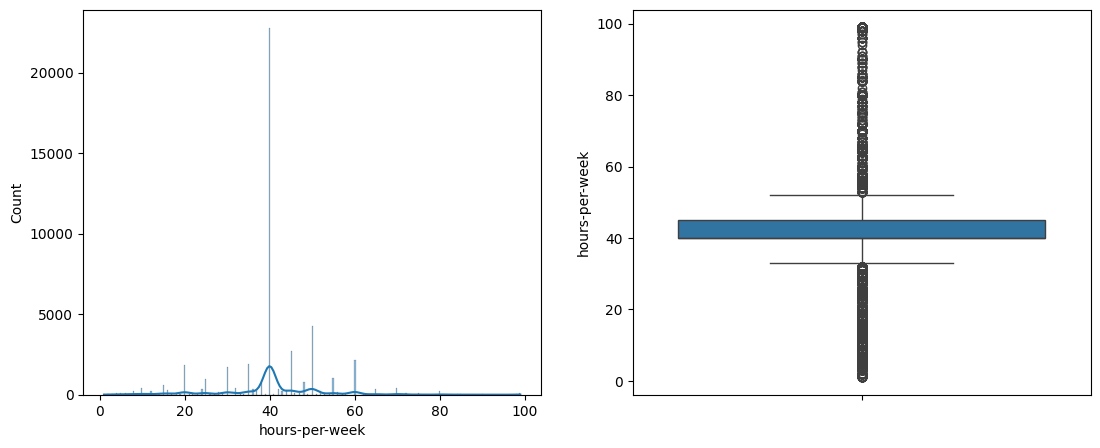

In [5]:
numerical_data = df.select_dtypes(include=['float64','int64'])
for i in numerical_data:
    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    sns.histplot(data=numerical_data,x=i,kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(data=numerical_data,y=i)
    plt.show()

In [6]:
categorical_data = df.select_dtypes(include='category')
for c in categorical_data.columns:
    print(f"{c}:\n {categorical_data[c].unique()}, nunique: {categorical_data[c].nunique()}")
    print(categorical_data[c].value_counts())
    print("-" * 40)

workclass:
 ['Private', 'Local-gov', NaN, 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'], nunique: 8
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
----------------------------------------
education:
 ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college'], nunique: 16
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-ac

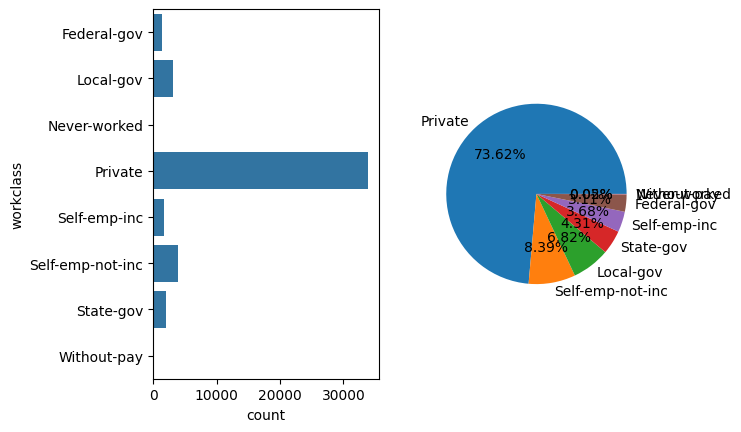

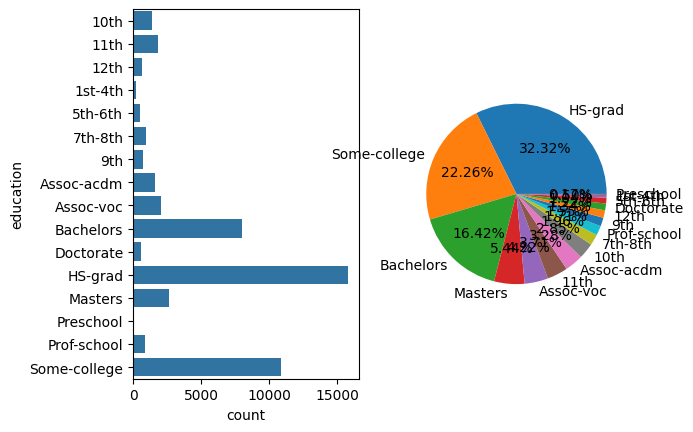

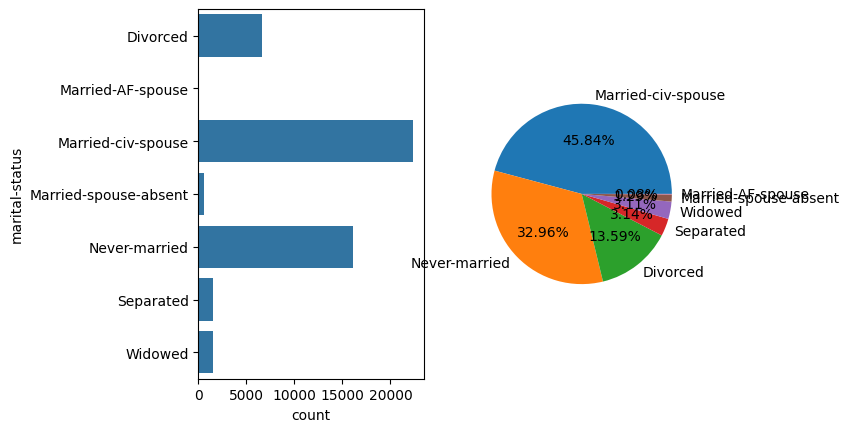

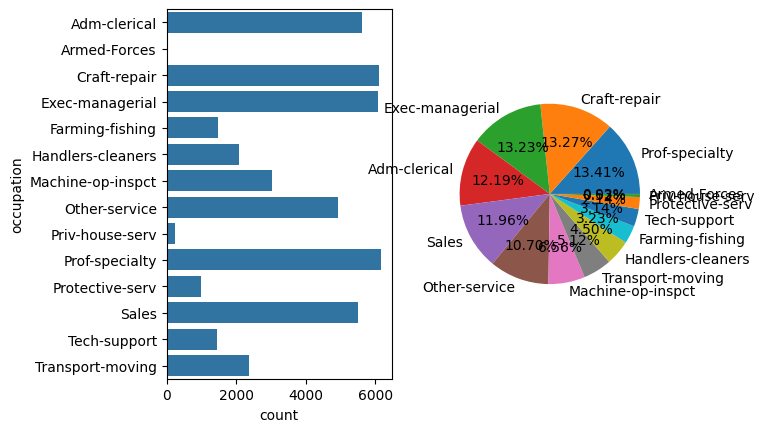

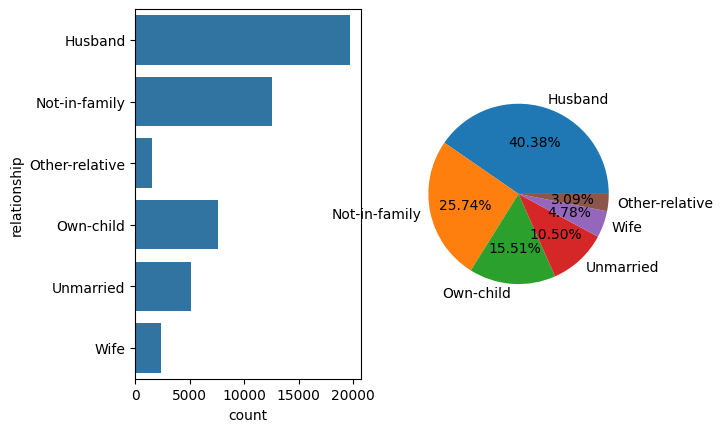

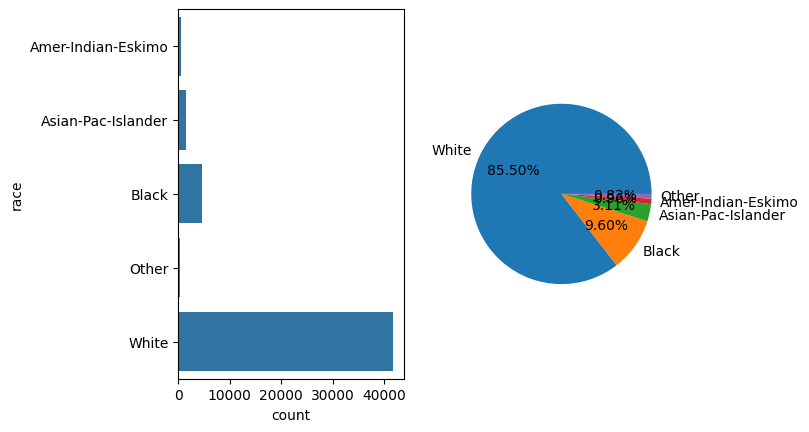

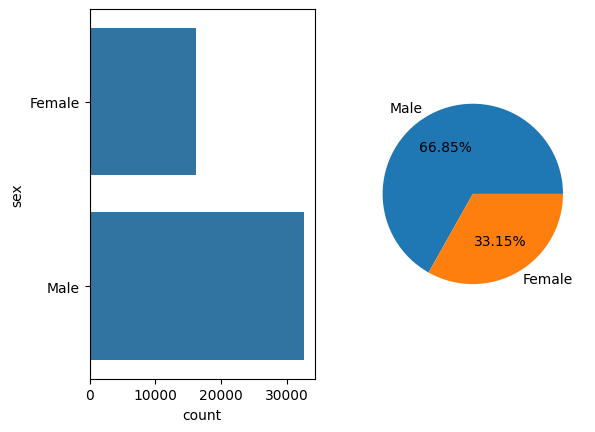

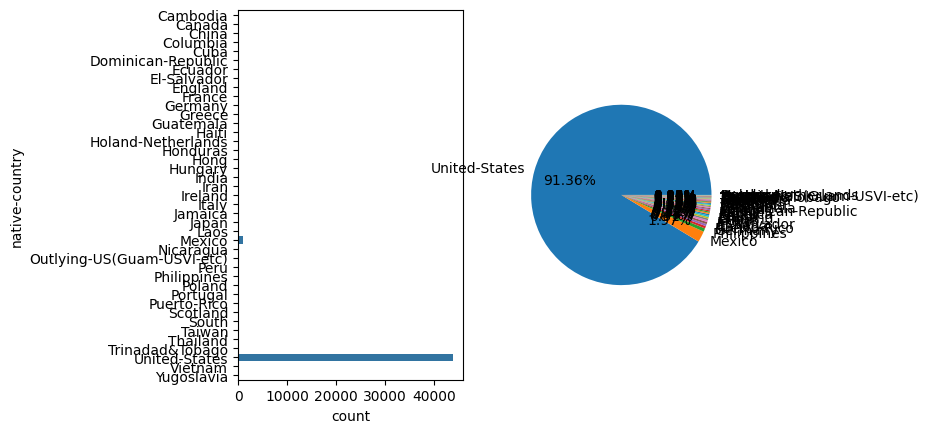

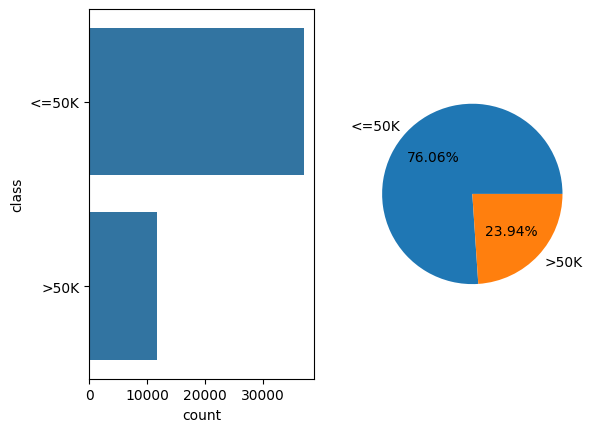

In [7]:
for c in categorical_data:
    plt.subplot(1,2,1)
    sns.countplot(data=categorical_data , y=c)

    plt.subplot(1,2,2)
    val = categorical_data[c].value_counts()
    plt.pie(val.values,labels=val.index,autopct='%1.2f%%')

    plt.show()

In [8]:
X = df.drop(columns="class")
y = df["class"]

### Preprocessing

In [9]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48790, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [10]:
y = y.apply(lambda x: 1 if x == '<=50K' else 0).astype(int)
print(y.value_counts())

class
1    37109
0    11681
Name: count, dtype: int64


In [11]:
X = X.drop(columns='native-country')

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder

In [13]:
categorical_cols = X.select_dtypes(include='category').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("categorical",categorical_transformer,categorical_cols),
    ("numerical",numerical_transformer,numerical_cols)
])

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_tmp,y_train,y_tmp = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_tmp,y_tmp,test_size=0.5,stratify=y_tmp,random_state=42)

print(f"train:{X_train.shape},{y_train.shape}")
print(f"val:{X_val.shape},{y_val.shape}")
print(f"test:{X_test.shape},{y_test.shape}")

train:(34153, 13),(34153,)
val:(7318, 13),(7318,)
test:(7319, 13),(7319,)


In [15]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()
X_test = preprocessor.transform(X_test).toarray()

print(f"train:{X_train.shape},{y_train.shape}")
print(f"val:{X_val.shape},{y_val.shape}")
print(f"test:{X_test.shape},{y_test.shape}")

train:(34153, 57),(34153,)
val:(7318, 57),(7318,)
test:(7319, 57),(7319,)



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam

def create_model():
    model = Sequential([
    Dense(10, activation='relu', input_shape=(57,)),
    Dense(1,activation='sigmoid')
    ])
    return model

In [44]:
def plot_history(history):
    loss = history.history.get('loss')[1:]
    val_loss = history.history.get('val_loss')[1:]
    accuracy = history.history.get('accuracy')[1:]
    val_accuracy = history.history.get('val_accuracy')[1:]
    epochs = history.epoch[1:] #skipping first epoch to fix the scale of the graph

    plt.subplot(1,2,1)
    plt.plot(epochs,loss,'b-',label='Training Loss')
    plt.plot(epochs,val_loss,'r-',label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,'b-',label='Training Accuracy')
    plt.plot(epochs,val_accuracy,'r-',label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

SGD

In [17]:
model_sgd = create_model()
optimizer = SGD(learning_rate=0.01)
model_sgd.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,batch_size=1,verbose=True)

Epoch 1/10
34153/34153 [==============================] - 272s 8ms/step - loss: 70.5046 - accuracy: 0.8026 - val_loss: 0.3677 - val_accuracy: 0.8113
Epoch 2/10
34153/34153 [==============================] - 294s 9ms/step - loss: 0.3687 - accuracy: 0.8141 - val_loss: 0.3675 - val_accuracy: 0.8153
Epoch 3/10
34153/34153 [==============================] - 226s 7ms/step - loss: 0.3654 - accuracy: 0.8172 - val_loss: 0.3652 - val_accuracy: 0.8132
Epoch 4/10
34153/34153 [==============================] - 76s 2ms/step - loss: 0.3634 - accuracy: 0.8174 - val_loss: 0.3596 - val_accuracy: 0.8174
Epoch 5/10
34153/34153 [==============================] - 73s 2ms/step - loss: 0.3590 - accuracy: 0.8183 - val_loss: 0.3603 - val_accuracy: 0.8192
Epoch 6/10
34153/34153 [==============================] - 74s 2ms/step - loss: 0.3574 - accuracy: 0.8201 - val_loss: 0.3575 - val_accuracy: 0.8154
Epoch 7/10
34153/34153 [==============================] - 78s 2ms/step - loss: 0.3572 - accuracy: 0.8200 - val_los

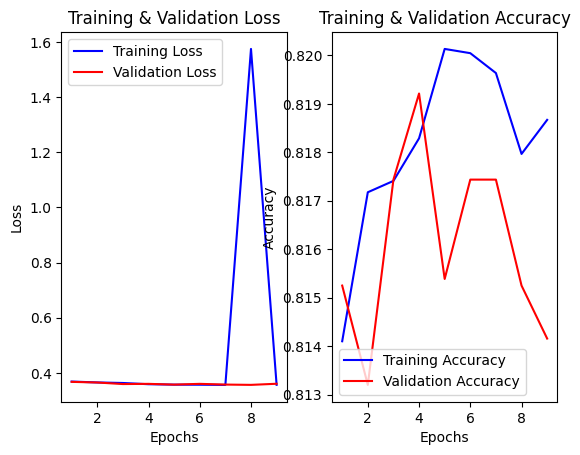

In [45]:
plot_history(history_sgd)

Momentum

In [18]:
model_momentum = create_model()
optimizer = SGD(learning_rate=0.01,momentum=0.9)
model_momentum.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_momentum = model_momentum.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,batch_size=1,verbose=True)

Epoch 1/10
34153/34153 [==============================] - 78s 2ms/step - loss: 6068757.5000 - accuracy: 0.7803 - val_loss: 0.3866 - val_accuracy: 0.7760
Epoch 2/10
34153/34153 [==============================] - 76s 2ms/step - loss: 0.3917 - accuracy: 0.7880 - val_loss: 0.3868 - val_accuracy: 0.7934
Epoch 3/10
34153/34153 [==============================] - 276s 8ms/step - loss: 0.3910 - accuracy: 0.7865 - val_loss: 0.4039 - val_accuracy: 0.7928
Epoch 4/10
34153/34153 [==============================] - 337s 10ms/step - loss: 0.3931 - accuracy: 0.7882 - val_loss: 0.3981 - val_accuracy: 0.7923
Epoch 5/10
34153/34153 [==============================] - 323s 9ms/step - loss: 0.3917 - accuracy: 0.7847 - val_loss: 0.3828 - val_accuracy: 0.7923
Epoch 6/10
34153/34153 [==============================] - 328s 10ms/step - loss: 0.3918 - accuracy: 0.7853 - val_loss: 0.3871 - val_accuracy: 0.7916
Epoch 7/10
34153/34153 [==============================] - 184s 5ms/step - loss: 0.3919 - accuracy: 0.7844 

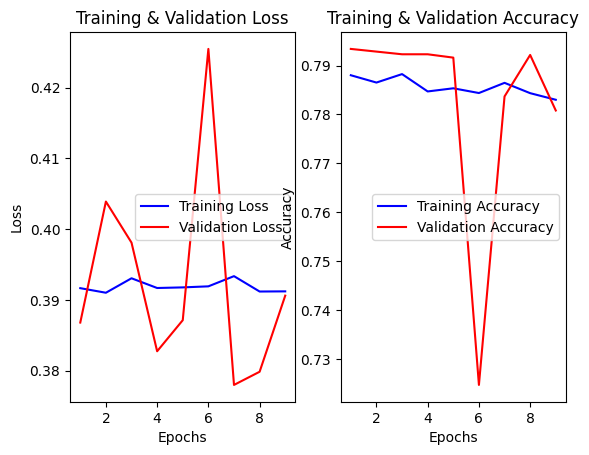

In [46]:
plot_history(history_momentum)

Adam

In [19]:
model_adam = create_model()
optimizer = Adam(learning_rate=0.01)
model_adam.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,batch_size=1,verbose=True)

Epoch 1/10
34153/34153 [==============================] - 80s 2ms/step - loss: 1.2346 - accuracy: 0.8095 - val_loss: 0.3741 - val_accuracy: 0.8124
Epoch 2/10
34153/34153 [==============================] - 81s 2ms/step - loss: 0.3757 - accuracy: 0.8114 - val_loss: 0.3653 - val_accuracy: 0.8095
Epoch 3/10
34153/34153 [==============================] - 77s 2ms/step - loss: 0.3966 - accuracy: 0.8112 - val_loss: 0.3910 - val_accuracy: 0.8099
Epoch 4/10
34153/34153 [==============================] - 79s 2ms/step - loss: 0.3767 - accuracy: 0.8125 - val_loss: 0.3807 - val_accuracy: 0.8020
Epoch 5/10
34153/34153 [==============================] - 79s 2ms/step - loss: 0.3757 - accuracy: 0.8128 - val_loss: 0.3737 - val_accuracy: 0.8118
Epoch 6/10
34153/34153 [==============================] - 78s 2ms/step - loss: 0.3785 - accuracy: 0.8133 - val_loss: 0.3745 - val_accuracy: 0.8049
Epoch 7/10
34153/34153 [==============================] - 79s 2ms/step - loss: 0.3781 - accuracy: 0.8107 - val_loss: 0

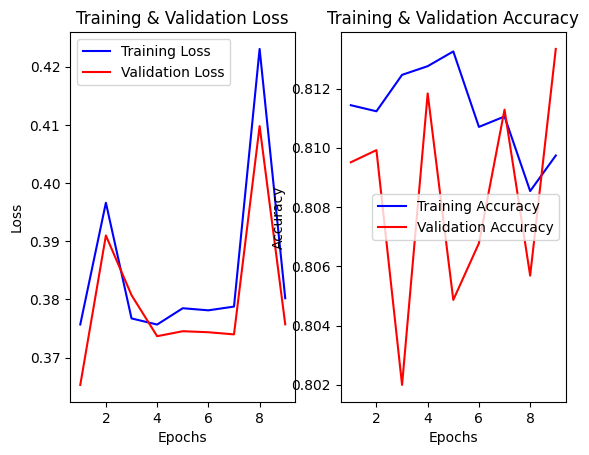

In [47]:
plot_history(history_adam)

- Adam seemingly is the smoothest in loss but not that far from momentum 
- adam and sgd had hightest accuracy than momentum

## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

b = 1 
- same as previous model

In [20]:
history_b1 = history_adam

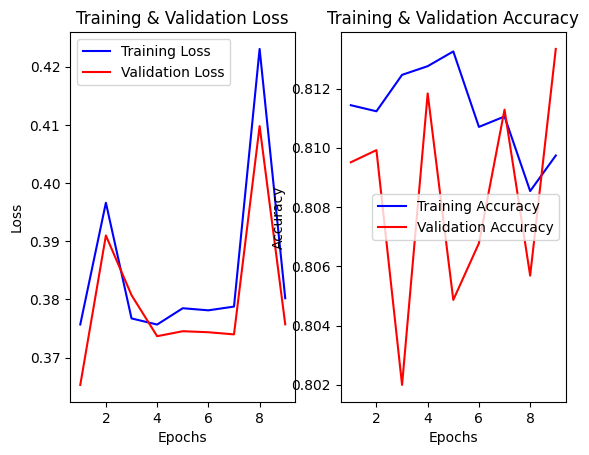

In [48]:
plot_history(history_b1)

b = 32

In [21]:
model_b2 = create_model()
optimizer = Adam(learning_rate=0.01)
model_b2.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_b2 = model_b2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,batch_size=32,verbose=True)

Epoch 1/10
1068/1068 [==============================] - 4s 3ms/step - loss: 4.2628 - accuracy: 0.8169 - val_loss: 0.6340 - val_accuracy: 0.7989
Epoch 2/10
1068/1068 [==============================] - 3s 3ms/step - loss: 0.7508 - accuracy: 0.8374 - val_loss: 0.3644 - val_accuracy: 0.8431
Epoch 3/10
1068/1068 [==============================] - 3s 3ms/step - loss: 0.3874 - accuracy: 0.8466 - val_loss: 0.3839 - val_accuracy: 0.8233
Epoch 4/10
1068/1068 [==============================] - 3s 3ms/step - loss: 0.3314 - accuracy: 0.8473 - val_loss: 0.3228 - val_accuracy: 0.8511
Epoch 5/10
1068/1068 [==============================] - 3s 3ms/step - loss: 0.3237 - accuracy: 0.8504 - val_loss: 0.3232 - val_accuracy: 0.8502
Epoch 6/10
1068/1068 [==============================] - 3s 3ms/step - loss: 0.3249 - accuracy: 0.8492 - val_loss: 0.3276 - val_accuracy: 0.8471
Epoch 7/10
1068/1068 [==============================] - 3s 3ms/step - loss: 0.3389 - accuracy: 0.8394 - val_loss: 0.4031 - val_accuracy:

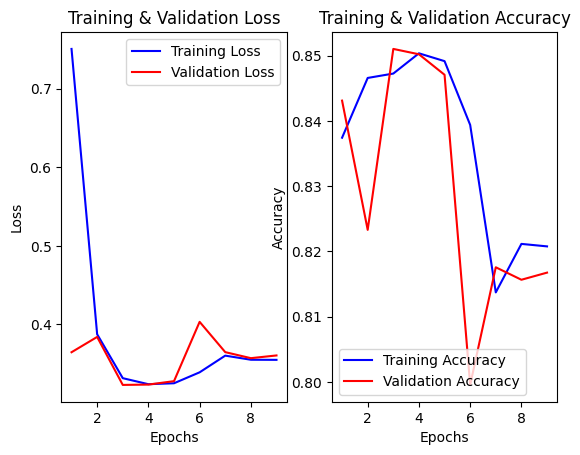

In [49]:
plot_history(history_b2)

b = 128

In [22]:
model_b3 = create_model()
optimizer = Adam(learning_rate=0.01)
model_b3.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_b3 = model_b3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,batch_size=128,verbose=True)

Epoch 1/10
267/267 [==============================] - 1s 4ms/step - loss: 1.6609 - accuracy: 0.8070 - val_loss: 0.3557 - val_accuracy: 0.8297
Epoch 2/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8371 - val_loss: 0.4599 - val_accuracy: 0.8377
Epoch 3/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8460 - val_loss: 0.3240 - val_accuracy: 0.8474
Epoch 4/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8452 - val_loss: 0.3229 - val_accuracy: 0.8513
Epoch 5/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8471 - val_loss: 0.3212 - val_accuracy: 0.8526
Epoch 6/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3251 - accuracy: 0.8509 - val_loss: 0.3211 - val_accuracy: 0.8520
Epoch 7/10
267/267 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8524 - val_loss: 0.3200 - val_accuracy: 0.8547
Epoch 

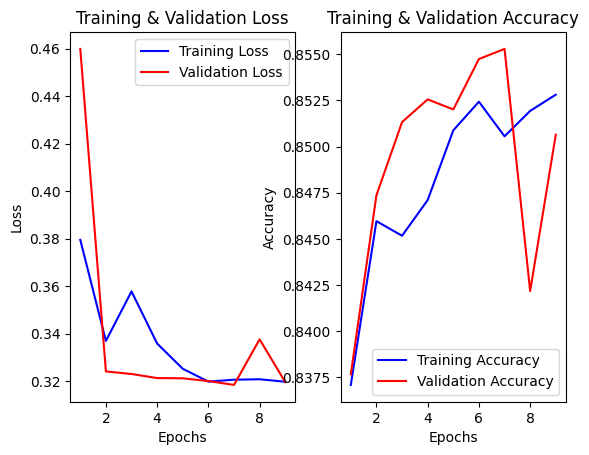

In [50]:
plot_history(history_b3)

b = 1024

In [23]:
model_b4 = create_model()
optimizer = Adam(learning_rate=0.01)
model_b4.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_b4 = model_b4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,batch_size=1024,verbose=True)

Epoch 1/10
34/34 [==============================] - 0s 7ms/step - loss: 18.7658 - accuracy: 0.7908 - val_loss: 8.1066 - val_accuracy: 0.8173
Epoch 2/10
34/34 [==============================] - 0s 5ms/step - loss: 2.7439 - accuracy: 0.8201 - val_loss: 0.8741 - val_accuracy: 0.8222
Epoch 3/10
34/34 [==============================] - 0s 5ms/step - loss: 1.2410 - accuracy: 0.8260 - val_loss: 1.3574 - val_accuracy: 0.8291
Epoch 4/10
34/34 [==============================] - 0s 5ms/step - loss: 1.0507 - accuracy: 0.8307 - val_loss: 0.7333 - val_accuracy: 0.8225
Epoch 5/10
34/34 [==============================] - 0s 5ms/step - loss: 1.0428 - accuracy: 0.8267 - val_loss: 0.5993 - val_accuracy: 0.8338
Epoch 6/10
34/34 [==============================] - 0s 5ms/step - loss: 1.1155 - accuracy: 0.8304 - val_loss: 1.1576 - val_accuracy: 0.8289
Epoch 7/10
34/34 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.8410 - val_loss: 0.4013 - val_accuracy: 0.8434
Epoch 8/10
34/34 [=

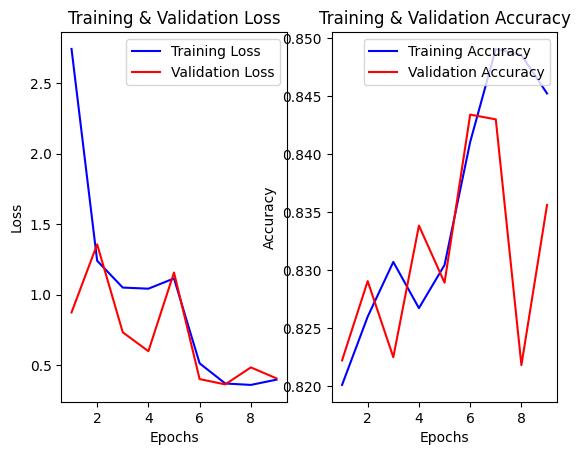

In [51]:
plot_history(history_b4)

- as the batch size increased the training time decreased
- generally larger batch sizes where smoother and had higher accuracy
- the drawback in batch size is the risk of overfitting however wasn't supported that much in the data above


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


In [52]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

Control

In [53]:
model_control = Sequential([
    Dense(32, activation='relu', input_shape=(57,)),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])
optimizer = Adam(learning_rate=0.01)
model_control.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_control = model_control.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,batch_size=128,verbose=True)

Epoch 1/50
267/267 [==============================] - 2s 5ms/step - loss: 4.6820 - accuracy: 0.8097 - val_loss: 0.3820 - val_accuracy: 0.8356
Epoch 2/50
267/267 [==============================] - 1s 4ms/step - loss: 0.6717 - accuracy: 0.8301 - val_loss: 0.3538 - val_accuracy: 0.8347
Epoch 3/50
267/267 [==============================] - 1s 4ms/step - loss: 0.3843 - accuracy: 0.8434 - val_loss: 0.4861 - val_accuracy: 0.8247
Epoch 4/50
267/267 [==============================] - 1s 4ms/step - loss: 0.3915 - accuracy: 0.8445 - val_loss: 0.3285 - val_accuracy: 0.8512
Epoch 5/50
267/267 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.8484 - val_loss: 0.3322 - val_accuracy: 0.8433
Epoch 6/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4382 - accuracy: 0.8472 - val_loss: 0.3705 - val_accuracy: 0.8363
Epoch 7/50
267/267 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8505 - val_loss: 0.3241 - val_accuracy: 0.8523
Epoch 

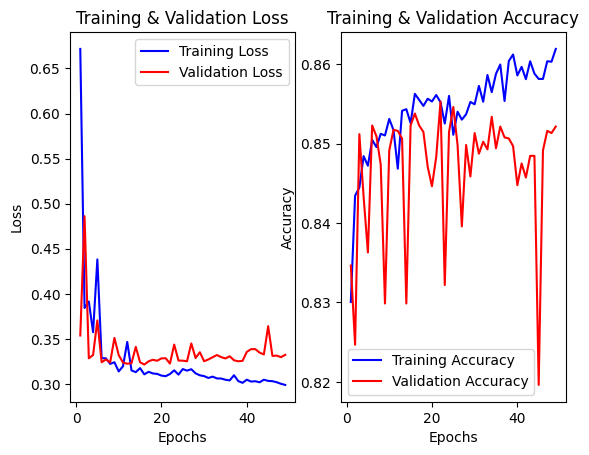

In [54]:
plot_history(history_control)

L2

In [55]:
model_l2 = Sequential([
    Dense(32, activation='relu', input_shape=(57,),kernel_regularizer=l2(0.01)),
    Dense(10, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(1,activation='sigmoid')
])
optimizer = Adam(learning_rate=0.01)
model_l2.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,batch_size=128,verbose=True)

Epoch 1/50
267/267 [==============================] - 2s 5ms/step - loss: 2.3671 - accuracy: 0.7887 - val_loss: 2.8390 - val_accuracy: 0.8107
Epoch 2/50
267/267 [==============================] - 1s 3ms/step - loss: 1.1891 - accuracy: 0.8073 - val_loss: 0.5291 - val_accuracy: 0.8166
Epoch 3/50
267/267 [==============================] - 1s 4ms/step - loss: 0.5498 - accuracy: 0.8211 - val_loss: 0.5140 - val_accuracy: 0.7971
Epoch 4/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4655 - accuracy: 0.8251 - val_loss: 0.7335 - val_accuracy: 0.8092
Epoch 5/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.8283 - val_loss: 0.4372 - val_accuracy: 0.8315
Epoch 6/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.8308 - val_loss: 0.4302 - val_accuracy: 0.8275
Epoch 7/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8320 - val_loss: 0.4171 - val_accuracy: 0.8284
Epoch 

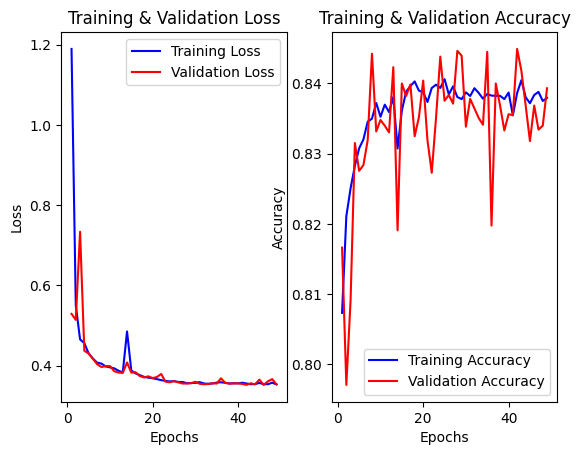

In [56]:
plot_history(history_l2)

Dropout

In [57]:
model_dropout = model = Sequential([
    Dropout(0.5),
    Dense(32, activation='relu', input_shape=(57,)),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])
optimizer = Adam(learning_rate=0.01)
model_dropout.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,batch_size=128,verbose=True)

Epoch 1/50
267/267 [==============================] - 2s 4ms/step - loss: 0.9679 - accuracy: 0.7878 - val_loss: 0.3791 - val_accuracy: 0.8136
Epoch 2/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.7998 - val_loss: 0.3648 - val_accuracy: 0.8158
Epoch 3/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8000 - val_loss: 0.3673 - val_accuracy: 0.8151
Epoch 4/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8030 - val_loss: 0.3772 - val_accuracy: 0.8131
Epoch 5/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.7987 - val_loss: 0.3760 - val_accuracy: 0.8155
Epoch 6/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.8033 - val_loss: 0.3783 - val_accuracy: 0.8140
Epoch 7/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4057 - accuracy: 0.8026 - val_loss: 0.3734 - val_accuracy: 0.8125
Epoch 

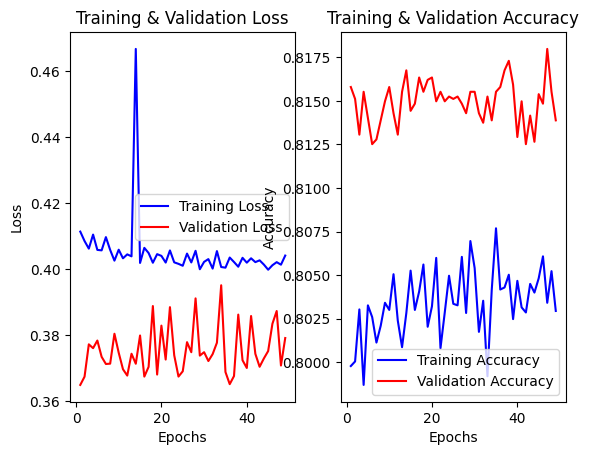

In [58]:
plot_history(history_dropout)

- The control showed overfitting which is predicted
- The l2 overcame the overfitting 
- the drop out results were not predicted but definetly not overfitting

## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10,min_delta=0.00001, restore_best_weights=True)
history_earlystop = model_control.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,batch_size=128,callbacks=[early_stopping],verbose=True)

Epoch 1/50
267/267 [==============================] - 3s 10ms/step - loss: 0.2986 - accuracy: 0.8602 - val_loss: 0.3544 - val_accuracy: 0.8415
Epoch 2/50
267/267 [==============================] - 1s 5ms/step - loss: 0.2940 - accuracy: 0.8624 - val_loss: 0.3346 - val_accuracy: 0.8490
Epoch 3/50
267/267 [==============================] - 1s 4ms/step - loss: 0.2964 - accuracy: 0.8634 - val_loss: 0.3364 - val_accuracy: 0.8457
Epoch 4/50
267/267 [==============================] - 1s 4ms/step - loss: 0.2952 - accuracy: 0.8610 - val_loss: 0.3416 - val_accuracy: 0.8485
Epoch 5/50
267/267 [==============================] - 1s 4ms/step - loss: 0.2952 - accuracy: 0.8619 - val_loss: 0.3466 - val_accuracy: 0.8338
Epoch 6/50
267/267 [==============================] - 1s 4ms/step - loss: 0.2942 - accuracy: 0.8634 - val_loss: 0.3400 - val_accuracy: 0.8495
Epoch 7/50
267/267 [==============================] - 1s 4ms/step - loss: 0.2930 - accuracy: 0.8653 - val_loss: 0.3380 - val_accuracy: 0.8485
Epoch

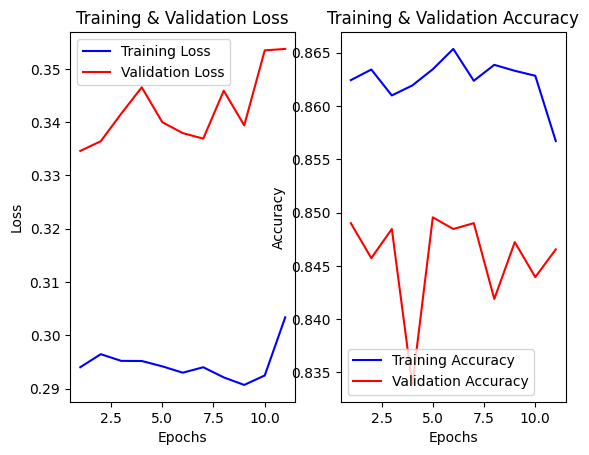

In [71]:
plot_history(history_earlystop)

- The early stop worked but the model didn't have enough epochs to train much

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?